## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 2.8~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-10}~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения, среднеквадратичное смещение и коэффициент самодиффузии рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 1500 шагов: 500 на уравновешивание системы при фиксированной температуре и 1000 на усреднение по времени и подсчёт функции радиального распределения;
   - Среднеквадратичное смещение и коэффициент самодиффузии вычислялись в течение всех 1500 шагов;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

#### Путь к файлам с данными

In [2]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, '2020-12-21')

In [3]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_T_')
transport_filename = os.path.join(PATH_TO_CURRENT_DATA, 'transport_T_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

#### Температуры, для которых была подчитана функция радиального распределения

In [4]:
temperatures = (
    2.80391,
    2.69923,
    2.29754,
    1.80409,
    1.29977,
    0.80038,
    0.30017,
    0.00000,
)

#### Извлечение значений функции радиального распределения из файлов

In [5]:
rdf_data = pd.DataFrame(columns=['radius'])
msd_data = pd.DataFrame()
diffusion_data = pd.DataFrame()

for temperature in temperatures:
    df = pd.read_csv(
        f'{rdf_filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    df = pd.read_csv(
        f'{transport_filename}{temperature:.5f}.csv',
        sep=';',
    )
    msd_data = pd.concat(
        [msd_data, df['msd']],
        axis=1,
    )
    diffusion_data = pd.concat(
        [diffusion_data, df['diffusion']],
        axis=1,
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    msd_data = msd_data.rename(columns={'msd': f'{temperature:.5f}'})
    diffusion_data = diffusion_data.rename(columns={'diffusion': f'{temperature:.5f}'})
    
msd_data['time'] = msd_data.index.values * 0.005
diffusion_data['time'] = diffusion_data.index.values * 0.005

msd_data

,2.80391,2.69923,2.29754,1.80409,1.29977,0.80038,0.30017,0.00000,time
0,0.000211,0.000203,0.000173,0.000136,0.000098,0.000060,0.000023,1.502863e-12,0
1,0.000842,0.000810,0.000688,0.000541,0.000390,0.000240,0.000090,3.050547e-12,0.005
2,0.001886,0.001813,0.001541,0.001211,0.000875,0.000539,0.000202,5.895763e-12,0.01
3,0.003334,0.003202,0.002721,0.002141,0.001550,0.000955,0.000358,9.995711e-12,0.015
4,0.005172,0.004963,0.004215,0.003325,0.002410,0.001487,0.000557,1.530799e-11,0.02
...,...,...,...,...,...,...,...,...,...
1495,11.090530,10.395123,9.149835,7.390324,5.235734,3.154603,0.403694,9.129047e-07,7.475
1496,11.095162,10.402150,9.156426,7.397859,5.239877,3.157368,0.403904,9.141782e-07,7.48
1497,11.099929,10.409097,9.163033,7.405385,5.243951,3.160118,0.404116,9.154532e-07,7.485
1498,11.104831,10.415990,9.169663,7.412897,5.247949,3.162849,0.404328,9.167285e-07,7.49


#### Графики функций радиального распределения при различных температурах

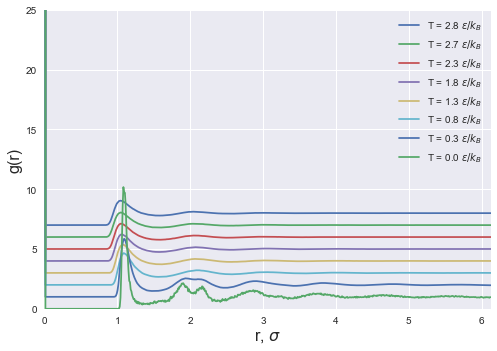

In [6]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$', fontsize=16);
plt.ylabel('g(r)', fontsize=16);
plt.xlim(left=0, right=6.125);
plt.ylim(
    bottom=0, 
    top=25,
);
plt.legend();

#### Временная зависимость среднеквадратичного смещения при различных температурах

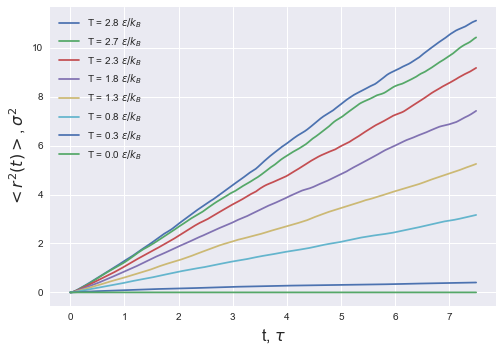

In [7]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        msd_data['time'],
        msd_data[f'{temperature:.5f}'], 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r't, $\tau $', fontsize=16);
plt.ylabel(r'$<r^2(t)>$, $\sigma^2$', fontsize=16);
plt.xlim(
#     left=0, 
#     right=6.125,
);
plt.ylim(
#     bottom=0, 
#     top=20,
);
plt.legend();

#### Временная зависимость коэффициента самодиффузии при различных температурах

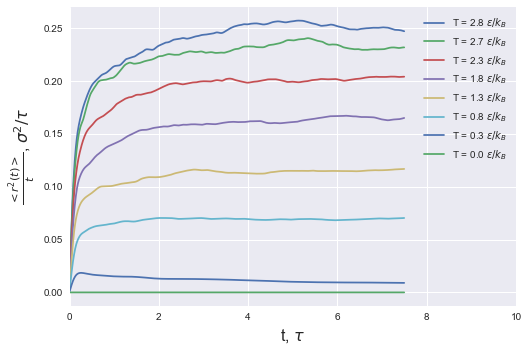

In [8]:
for i, temperature in enumerate(temperatures):
    diff_data = diffusion_data[f'{temperature:.5f}']
    plt.plot(
        diffusion_data['time'],
        diff_data, 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel(r't, $\tau$', fontsize=16);
plt.ylabel(r'$\frac{<r^2(t)>}{t}$, $\sigma^2 / \tau$', fontsize=16);
plt.xlim(
    left=0, 
    right=10,
);
plt.ylim(
#     bottom=0, 
#     top=0.1,
);
plt.legend();

#### Извлечение параметров системы из файла

In [9]:
system_parameters = pd.read_csv(parameters_filename, sep=';')

for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

,temperature,pressure,system_kinetic_energy,potential_energy,total_energy,virial,msd,diffusion
0,2.80391,4.48055,5770.45671,-5108.69465,665.90874,13160.10056,0.00021,0.00704
1,2.80361,4.46452,5769.83492,-5116.36726,654.08944,13080.03180,0.00084,0.01403
2,2.80432,4.44821,5771.29232,-5125.41566,644.41926,12991.32537,0.00189,0.02096
3,2.80533,4.42920,5773.37327,-5137.49791,633.79440,12883.56751,0.00333,0.02777
4,2.80601,4.40866,5774.77366,-5151.12586,622.24741,12766.09452,0.00517,0.03446
...,...,...,...,...,...,...,...,...
39995,0.00000,-0.50776,0.00004,-9443.25145,-9443.03516,-2800.64524,110.68267,0.09224
39996,0.00010,-0.50784,0.20640,-9443.24892,-9443.24888,-2800.61023,110.68267,0.09224
39997,0.00000,-0.50769,0.00004,-9443.23260,-9443.02620,-2800.23874,110.68266,0.09224
39998,0.00011,-0.50777,0.21620,-9443.23314,-9443.23309,-2800.22143,110.68266,0.09224


In [10]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

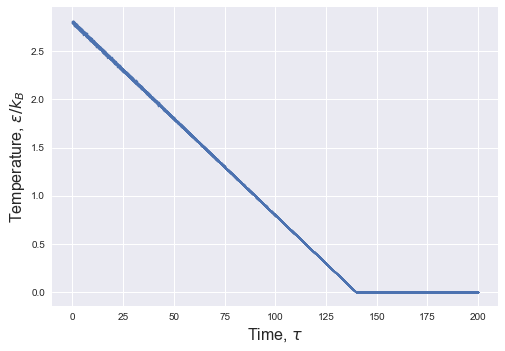

In [11]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Temperature, $\epsilon / k_B$', fontsize=16);

plt.ylim(
#     bottom=2.75,
#     top=2.85,
);

#### Зависимость давления системы от времени

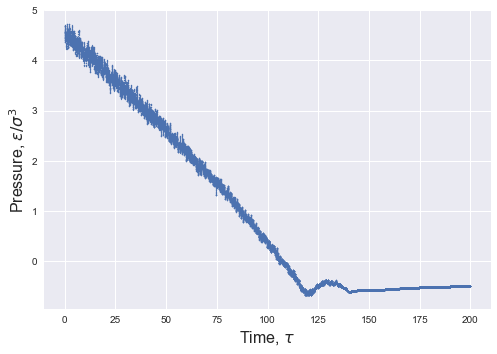

In [12]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $', fontsize=16);

plt.ylim(
#     bottom=3.5,
#     top=5.5,
);

#### Зависимость кинетической энергии системы от времени

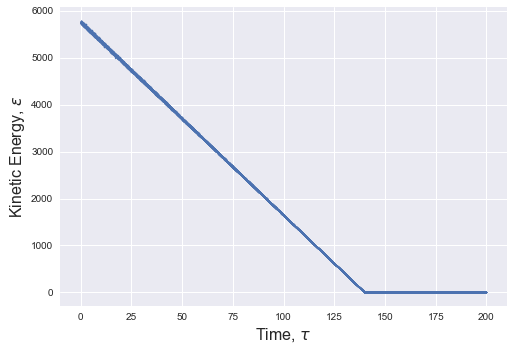

In [13]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Kinetic Energy, $\epsilon$', fontsize=16);

# plt.ylim(
#     bottom=-6000,
#     top=4000,
# );

#### Зависимость потенциальной энергии системы от времени

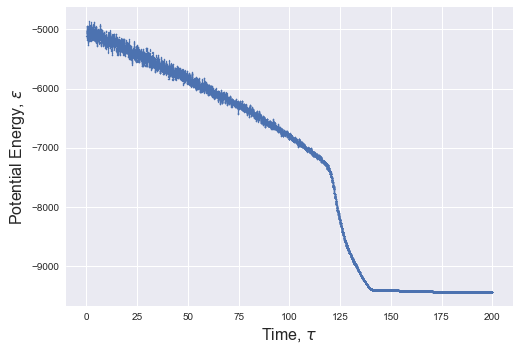

In [14]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Potential Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
#     top=4000,
);

#### Зависимость полной энергии системы от времени

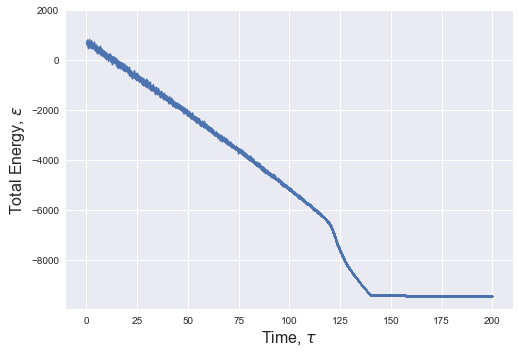

In [15]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Total Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
    top=2000,
);

#### Энергии на одном графике

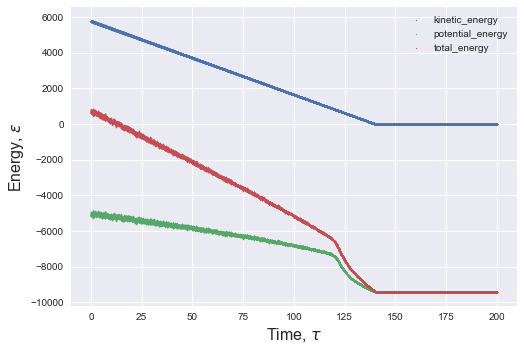

In [16]:
plt.scatter(
    times,
    system_parameters['system_kinetic_energy'],
    s=1,
    label='kinetic_energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='potential_energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='total_energy',
);

plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Energy, $\epsilon$', fontsize=16);
plt.legend();

plt.ylim(
#     bottom=-6000,
#     top=2000,
);